## Installation


In [ ]:
#!pip uninstall liac-arff
#!pip uninstall arff

In [ ]:
!pip install pandas==0.25.1
!pip install numpy
!pip install scikit-learn==0.22.2
!apt-get install swig -y
!pip install liac-arff
!pip install smac==0.12.3
!pip install auto-sklearn==0.9.0
!pip install tensorflow

  Using cached https://files.pythonhosted.org/packages/e1/7f/366dcba1ba076a88a50bea732dbc033c0c5bbf7876010e6edc67948579d5/scikit_learn-0.22.2-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: scikit-learn 0.23.2
    Uninstalling scikit-learn-0.23.2:
      Successfully uninstalled scikit-learn-0.23.2
  Using cached https://files.pythonhosted.org/packages/5c/a1/273def87037a7fb010512bbc5901c31cfddfca8080bc63b42b26e3cc55b3/scikit_learn-0.23.2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: auto-sklearn 0.9.0 has requirement scikit-learn<0.23,>=0.22.0, but you'll have scikit-learn 0.23.2 which is incompatible.
  Found existing installation: scikit-learn 0.22.2
    Uninstalling scikit-learn-0.22.2:
      Successfully uninstalled scikit-learn-0.22.2
Reading package lists... Done
Building dependency tree       
Reading state information... Done
swig is already the newest version (3.0.12-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
Processing /root/.cache/pip/wheels

## Version Check

In [ ]:
import sys
import numpy as np
import pandas as pd
import tensorflow
import smac
import sklearn
import autosklearn

In [ ]:
print(sys.version)
print(pd.__version__)
print(np.version.version)
print(sklearn.__version__)
print(smac.__version__)
print(autosklearn.__version__)
print(tensorflow.__version__)

3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
0.25.1
1.18.5
0.22.2.post1
0.12.3
0.9.0
2.3.0


In [ ]:
from autosklearn import regression

## Read Data

In [ ]:
dataset = pd.read_excel("./sample_data/merge_V4.xlsx")

In [ ]:
dataset.tail()

,Unnamed: 0,Datetime,Period,Mother_Code,Product_Code,Product_Name,Category,Unit_Price,Sales_Price,Rate,Time,Weekday,Month,Season,log_unit,Sky,Rhm,Tem,Holiday,Pop,mise_alert,Product_S,Time_encode,Time_zone,Mother_Code_Cat
37363,37363,2019-12-31 23:20:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,kitchen,148000,1664000,0.0,23:20:00,1,12,1,11.904968,0,0,0,0,0,0,0,145,5,374
37364,37364,2019-12-31 23:40:00,20.0,100448,201390,일시불쿠첸압력밥솥 10인용,kitchen,168000,15282000,0.0,23:40:00,1,12,1,12.031719,0,0,0,0,0,0,0,147,5,374
37365,37365,2019-12-31 23:40:00,20.0,100448,201384,무이자쿠첸압력밥솥 6인용,kitchen,158000,2328000,0.0,23:40:00,1,12,1,11.970350,0,0,0,0,0,0,0,147,5,374
37366,37366,2019-12-31 23:40:00,20.0,100448,201383,무이자쿠첸압력밥솥 10인용,kitchen,178000,9149000,0.0,23:40:00,1,12,1,12.089539,0,0,0,0,0,0,0,147,5,374
37367,37367,2019-12-31 23:40:00,20.0,100448,201391,일시불쿠첸압력밥솥 6인용,kitchen,148000,10157000,0.0,23:40:00,1,12,1,11.904968,0,0,0,0,0,0,0,147,5,374


In [ ]:
dataset = dataset.reset_index(drop=True)
del dataset['Unnamed: 0']

## *Correlation coefficient*

In [ ]:
%matplotlib inline

# 필요한 패키지와 라이브러리를 가져옴
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import font_manager
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
st = dataset.apply(LabelEncoder().fit_transform)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


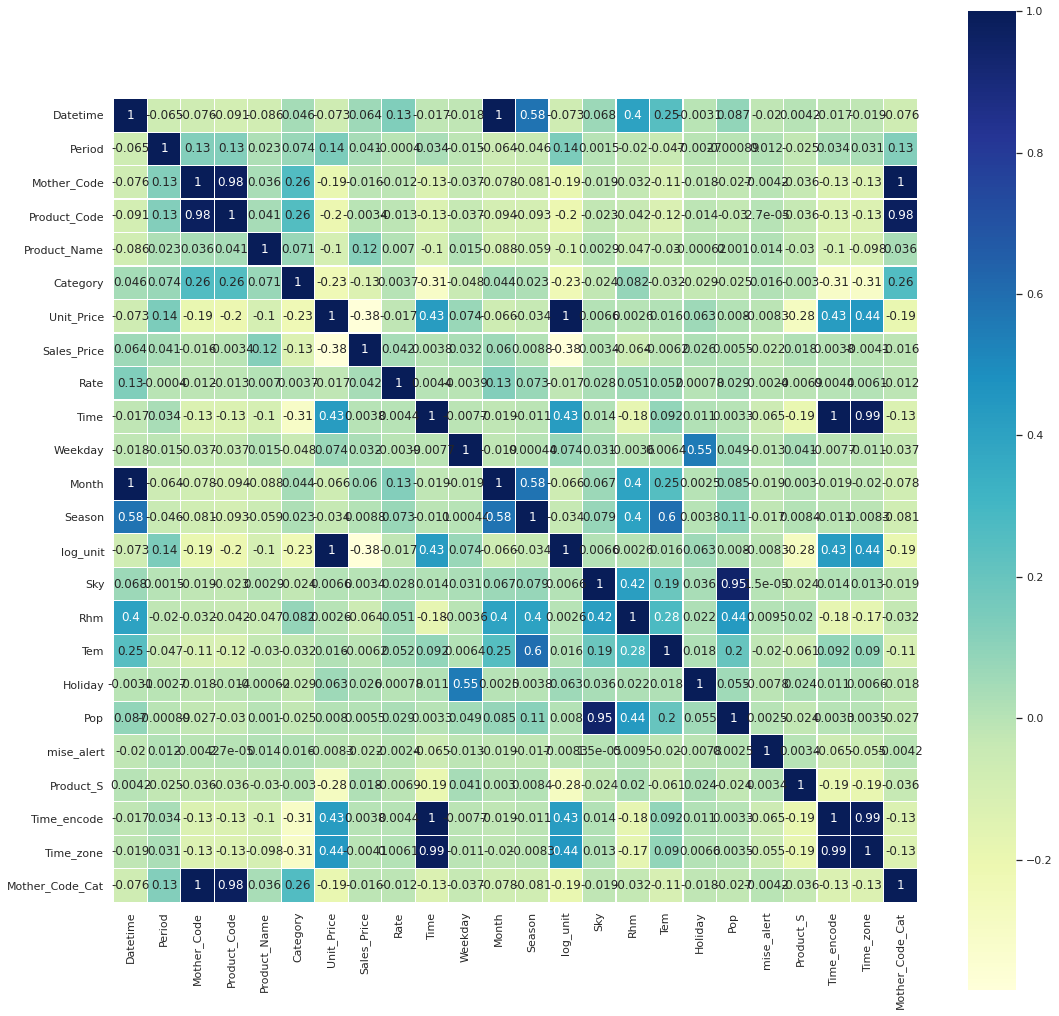

In [ ]:
sns.set(color_codes=True)
plt.figure(figsize=(18, 18))

sns.heatmap(st.astype(float).corr(), 
            linewidths=0.2, 
            square=True, 
            linecolor='white', 
            annot=True,
            cmap="YlGnBu"
           )
plt.show()

## Data Processing

In [ ]:
del dataset['Datetime']
del dataset['Mother_Code']
del dataset['Product_Code']
del dataset['Time']
del dataset['Product_Name']
del dataset['log_unit']
del dataset['Rhm']
dataset["Rate"] *= 10000

# 새 섹션

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder

str_col = ["Category"]
col_transform = make_column_transformer((OrdinalEncoder(), str_col))
dataset_transformed = col_transform.fit_transform(dataset)

In [ ]:
dataset_trans = pd.DataFrame(dataset_transformed, columns=str_col).astype(int)

In [ ]:
dataset_trans.tail()

,Category
37363,8
37364,8
37365,8
37366,8
37367,8


In [ ]:
dataset.head()

,Period,Category,Unit_Price,Sales_Price,Rate,Weekday,Month,Season,Sky,Tem,Holiday,Pop,mise_alert,Product_S,Time_encode,Time_zone,Mother_Code_Cat
0,20.0,clothing,39900,2099000,0.0,1,1,1,2,-7,1,10,0,1,14,0,296
1,20.0,clothing,39900,4371000,0.0,1,1,1,2,-7,1,10,0,2,14,0,296
2,20.0,clothing,39900,3262000,0.0,1,1,1,2,-7,1,10,0,1,16,0,296
3,20.0,clothing,39900,6955000,0.0,1,1,1,2,-7,1,10,0,2,16,0,296
4,20.0,clothing,39900,6672000,0.0,1,1,1,2,-7,1,10,0,1,18,0,296


In [ ]:
dataset.update(dataset_trans)

## Convert valuetype to Numeric

In [ ]:
for col in dataset.columns:
  dataset[col] = pd.to_numeric(dataset[col]).astype(int)

In [ ]:
dataset.head()

,Period,Category,Unit_Price,Sales_Price,Rate,Weekday,Month,Season,Sky,Tem,Holiday,Pop,mise_alert,Product_S,Time_encode,Time_zone,Mother_Code_Cat
0,20,4,39900,2099000,0,1,1,1,2,-7,1,10,0,1,14,0,296
1,20,4,39900,4371000,0,1,1,1,2,-7,1,10,0,2,14,0,296
2,20,4,39900,3262000,0,1,1,1,2,-7,1,10,0,1,16,0,296
3,20,4,39900,6955000,0,1,1,1,2,-7,1,10,0,2,16,0,296
4,20,4,39900,6672000,0,1,1,1,2,-7,1,10,0,1,18,0,296


## Normalization

In [ ]:
norm_min_max = [[10000,0] for _ in range(7)] # period, unit_code, Rate, tem, pop, time_encode, mother_code_cat

In [ ]:
for i in range(len(dataset)):
  norm_min_max[0][0] = min(norm_min_max[0][0],dataset.loc[i,"Period"])
  norm_min_max[0][1] = max(norm_min_max[0][1],dataset.loc[i,"Period"])
  norm_min_max[1][0] = min(norm_min_max[1][0],dataset.loc[i,"Unit_Price"])
  norm_min_max[1][1] = max(norm_min_max[1][1],dataset.loc[i,"Unit_Price"])
  norm_min_max[2][0] = min(norm_min_max[2][0],dataset.loc[i,"Rate"])
  norm_min_max[2][1] = max(norm_min_max[2][1],dataset.loc[i,"Rate"])
  norm_min_max[3][0] = min(norm_min_max[3][0],dataset.loc[i,"Tem"])
  norm_min_max[3][1] = max(norm_min_max[3][1],dataset.loc[i,"Tem"])
  norm_min_max[4][0] = min(norm_min_max[4][0],dataset.loc[i,"Pop"])
  norm_min_max[4][1] = max(norm_min_max[4][1],dataset.loc[i,"Pop"])
  norm_min_max[5][0] = min(norm_min_max[5][0],dataset.loc[i,"Time_encode"])
  norm_min_max[5][1] = max(norm_min_max[5][1],dataset.loc[i,"Time_encode"])
  norm_min_max[6][0] = min(norm_min_max[6][0],dataset.loc[i,"Mother_Code_Cat"])
  norm_min_max[6][1] = max(norm_min_max[6][1],dataset.loc[i,"Mother_Code_Cat"])

In [ ]:
norm_min_max

[[2, 40], [10000, 7930000], [0, 7170], [-10, 36], [0, 90], [0, 148], [0, 686]]

In [ ]:
norm_data = dataset.copy()
norm_col = ["Period","Unit_Price","Rate","Tem","Pop","Time_encode","Mother_Code_Cat"]
for col in norm_data.columns :
  if col not in norm_col : continue
  norm_data[col] += abs(norm_data[col].min())
  norm_data[col] = (norm_data[col]-norm_data[col].min())/(norm_data[col].max()-norm_data[col].min())

In [ ]:
norm_data

,Period,Category,Unit_Price,Sales_Price,Rate,Weekday,Month,Season,Sky,Tem,Holiday,Pop,mise_alert,Product_S,Time_encode,Time_zone,Mother_Code_Cat
0,0.473684,4,0.003423,2099000,0.0,1,1,1,2,0.065217,1,0.111111,0,1,0.094595,0,0.431487
1,0.473684,4,0.003423,4371000,0.0,1,1,1,2,0.065217,1,0.111111,0,2,0.094595,0,0.431487
2,0.473684,4,0.003423,3262000,0.0,1,1,1,2,0.065217,1,0.111111,0,1,0.108108,0,0.431487
3,0.473684,4,0.003423,6955000,0.0,1,1,1,2,0.065217,1,0.111111,0,2,0.108108,0,0.431487
4,0.473684,4,0.003423,6672000,0.0,1,1,1,2,0.065217,1,0.111111,0,1,0.121622,0,0.431487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37363,0.473684,8,0.017077,1664000,0.0,1,12,1,0,0.217391,0,0.000000,0,0,0.979730,5,0.545190
37364,0.473684,8,0.019603,15282000,0.0,1,12,1,0,0.217391,0,0.000000,0,0,0.993243,5,0.545190
37365,0.473684,8,0.018340,2328000,0.0,1,12,1,0,0.217391,0,0.000000,0,0,0.993243,5,0.545190
37366,0.473684,8,0.020866,9149000,0.0,1,12,1,0,0.217391,0,0.000000,0,0,0.993243,5,0.545190


In [ ]:
norm_data.head()

,Period,Category,Unit_Price,Sales_Price,Rate,Weekday,Month,Season,Sky,Tem,Holiday,Pop,mise_alert,Product_S,Time_encode,Time_zone,Mother_Code_Cat
0,0.473684,4,0.003423,2099000,0.0,1,1,1,2,0.065217,1,0.111111,0,1,0.094595,0,0.431487
1,0.473684,4,0.003423,4371000,0.0,1,1,1,2,0.065217,1,0.111111,0,2,0.094595,0,0.431487
2,0.473684,4,0.003423,3262000,0.0,1,1,1,2,0.065217,1,0.111111,0,1,0.108108,0,0.431487
3,0.473684,4,0.003423,6955000,0.0,1,1,1,2,0.065217,1,0.111111,0,2,0.108108,0,0.431487
4,0.473684,4,0.003423,6672000,0.0,1,1,1,2,0.065217,1,0.111111,0,1,0.121622,0,0.431487


## Train_test Split & Visualization Function

In [ ]:
dataset_x= norm_data.copy()
dataset_y = dataset_x.pop('Sales_Price')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
def regression_data():
    X_train, X_test, y_train, y_test = train_test_split(dataset_x, dataset_y,)
    return X_train, y_train, X_test, y_test

def visualize_regression(y_tes, y_pred):
  plt.rcParams["figure.figsize"] = (10,4)
  plt.rcParams['lines.linewidth'] = 4
  plt.rcParams['lines.color'] = 'r'
  plt.rcParams['axes.grid'] = True
  
  plt.scatter(np.arange(len(y_pred)), y_pred, label='blue')
  plt.scatter(np.arange(len(y_pred)), y_tes, color='red', label='true')

  plt.title('Scattered plot')
  print('RMSE:', mean_squared_error(y_tes, y_pred) ** 0.5)
  print('R2_score :', r2_score(y_tes, y_pred) ** 0.5)

## Decision Tree

In [ ]:
X_train, y_train, X_test, y_test = regression_data()

In [ ]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(28026, 16) (9342, 16) (28026,) (9342,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, y_train, X_test, y_test = regression_data()

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

# Evaluation
y_pred = dt.predict(X_test)
print(y_pred.shape)

(9342,)


RMSE: 16179991.544287896
R2_score : 0.6089292329209806


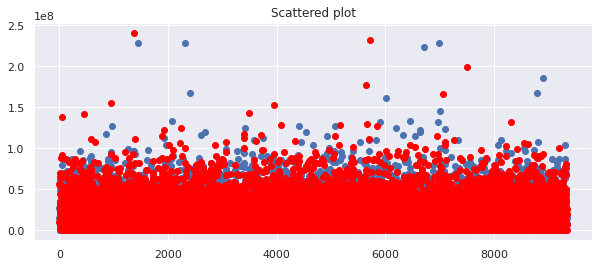

In [ ]:
visualize_regression(y_test, y_pred)

In [ ]:
score = 0
y_test_array = y_test.values
print("Decision Tree")
for i in range(len(y_test_array)):
      score_tmp= abs((y_pred[i]-y_test_array[i])/y_test_array[i])
      score += score_tmp
score = score * 100 / len(y_test_array)
print("Score = ",score)

Decision Tree
Score =  649.833380837189


## LightGBM

In [ ]:
import lightgbm as lgb


Best Iteration: 64

RMSE: 13810145.450193373
R2_score : 0.7375685990734635


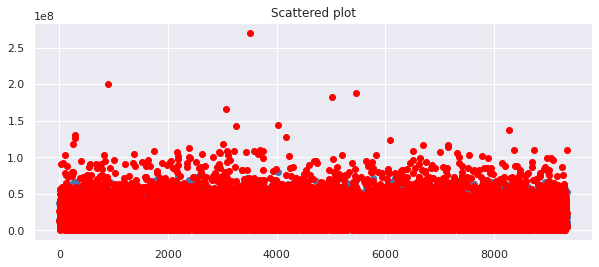

In [ ]:
X_train, y_train, X_test, y_test = regression_data()

gbm = lgb.LGBMRegressor(mc='0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0', 
                        learning_rate=0.07, 
                        n_estimators=64, 
                        seed=0)
gbm.fit(X_train, y_train, eval_metric='l2', 
        eval_set=[(X_test, y_test)],
        early_stopping_rounds=5, verbose=False)

print('Best Iteration:', gbm.best_iteration_)
print()
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

visualize_regression(y_test, y_pred)

In [ ]:
score = 0
y_test_array = y_test.values
print("LightGBM")
for i in range(len(y_test_array)):
      score_tmp= abs((y_pred[i]-y_test_array[i])/y_test_array[i])
      score += score_tmp
score = score * 100 / len(y_test_array)
print("Score = ",score)

LightGBM
Score =  1020.1833904146116


## Deep Learning

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: smac attempted to use a functionality that requires module emcee, but it couldn't be loaded. Please install emcee and retry.
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
RMSE: 15479243.483699793
R2_score : 0.6464635749200451


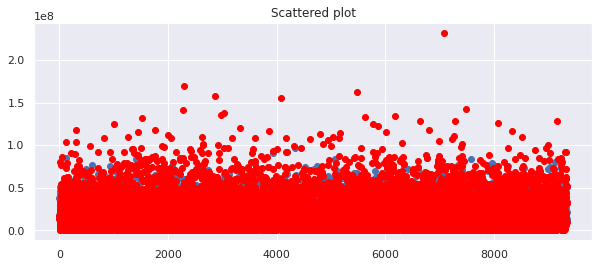

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

from tensorflow.random import set_seed
from sklearn.preprocessing import StandardScaler

np.random.seed(0)
set_seed(0)

# Data
X_train, y_train, X_test, y_test = regression_data()

# Scaling
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))

model = Sequential()
model.add(Dense(128, input_shape=(16,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(rate=0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse',  optimizer='adam',)

cb = EarlyStopping(monitor='val_loss', patience=20)
model.fit(X_train, y_train, batch_size=32, epochs=64, validation_data=(X_test, y_test), callbacks=[cb], verbose=0)

y_pred = model.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred).reshape(-1)
visualize_regression(y_test, y_pred)

In [ ]:
score = 0
y_test_array = y_test.values
print("Deep Learning")
for i in range(len(y_test_array)):
      score_tmp= abs((y_pred[i]-y_test_array[i])/y_test_array[i])
      score += score_tmp
score = score * 100 / len(y_test_array)
print("Score = ",score)

Deep Learning
Score =  1301.1957196608853


## Auto-ML

In [ ]:
from autosklearn.regression import AutoSklearnRegressor
import warnings

In [ ]:
warnings.simplefilter("ignore", category=RuntimeWarning)

X_train, y_train, X_test, y_test = regression_data()

automl = autosklearn.regression.AutoSklearnRegressor(time_left_for_this_task=5000, 
                              include_preprocessors=["no_preprocessing", ],
                              per_run_time_limit=1000,
                              ml_memory_limit=8192,
                              n_jobs=32)


In [ ]:
automl.fit(X_train, y_train)

[WARNING] [2020-09-26 17:15:32,853:AutoMLSMBO(1791095845)::bb2a0f3c3e82c2d97215f6edb967487b] Could not find meta-data directory /usr/local/lib/python3.6/dist-packages/autosklearn/metalearning/files/r2_regression_dense
[WARNING] [2020-09-26 17:36:08,648:EnsembleBuilder(1791095845):bb2a0f3c3e82c2d97215f6edb967487b] Memory Exception -- restart with less ensemble_nbest: 25
[WARNING] [2020-09-26 18:38:32,661:smac.runhistory.runhistory.RunHistory] Encountered exception Expecting value: line 1 column 1 (char 0) while reading runhistory from /tmp/autosklearn_tmp_dad7ae7a-001b-11eb-8bd2-0242ac1c0002/smac3-output/run_3751350723/runhistory.json. Not adding any runs!
[WARNING] [2020-09-26 18:38:36,119:smac.runhistory.runhistory.RunHistory] Encountered exception Expecting value: line 1 column 1 (char 0) while reading runhistory from /tmp/autosklearn_tmp_dad7ae7a-001b-11eb-8bd2-0242ac1c0002/smac3-output/run_3688901335/runhistory.json. Not adding any runs!


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


AutoSklearnRegressor(delete_output_folder_after_terminate=False,
                     delete_tmp_folder_after_terminate=False,
                     disable_evaluator_output=False, ensemble_memory_limit=1024,
                     ensemble_nbest=50, ensemble_size=50,
                     exclude_estimators=None, exclude_preprocessors=None,
                     get_smac_object_callback=None, include_estimators=None,
                     include_preprocessors=['no_preprocessing'],
                     initial_configurations_via_metalearning=25,
                     logging_config=None, max_models_on_disc=50,
                     metadata_directory=None, metric=None, ml_memory_limit=8192,
                     n_jobs=32, output_folder=None, per_run_time_limit=1000,
                     resampling_strategy='holdout',
                     resampling_strategy_arguments=None, seed=1,
                     shared_mode=False, smac_scenario_args=None,
                     time_left_for_this_task=500

In [ ]:
y_pred = automl.predict(X_test)

print(automl.show_models())

[(0.760000, SimpleRegressionPipeline({'data_preprocessing:categorical_transformer:categorical_encoding:__choice__': 'one_hot_encoding', 'data_preprocessing:categorical_transformer:category_coalescence:__choice__': 'minority_coalescer', 'data_preprocessing:numerical_transformer:imputation:strategy': 'median', 'data_preprocessing:numerical_transformer:rescaling:__choice__': 'robust_scaler', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessing:categorical_transformer:category_coalescence:minority_coalescer:minimum_fraction': 0.001389826509244052, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_max': 0.9450993324547414, 'data_preprocessing:numerical_transformer:rescaling:robust_scaler:q_min': 0.09767881692064806, 'regressor:gradient_boosting:early_stop': 'off', 'regressor:gradient_boosting:l2_regularization': 5.963640873807713e-08, 'regressor:gradient_boosting:learning_rate': 0.43024410789413203, 'regres

auto-sklearn results:
  Dataset name: bb2a0f3c3e82c2d97215f6edb967487b
  Metric: r2
  Best validation score: 0.653800
  Number of target algorithm runs: 408
  Number of successful target algorithm runs: 236
  Number of crashed target algorithm runs: 94
  Number of target algorithms that exceeded the time limit: 78
  Number of target algorithms that exceeded the memory limit: 0


RMSE: 11639558.93051788
R2_score : 0.8188807077296945


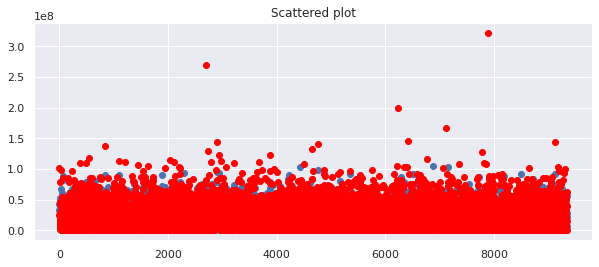

In [ ]:
print(automl.sprint_statistics())
print()
visualize_regression(y_test, y_pred)

In [ ]:
score = 0
y_test_array = y_test.values
print("Auto-ML")
for i in range(len(y_test_array)):
      score_tmp= abs((y_pred[i]-y_test_array[i])/y_test_array[i])
      score += score_tmp
score = score * 100 / len(y_test_array)
print("Score = ",score)

Auto-ML
Score =  643.699014756286


# 새 섹션

## Apply and Result

RMSE: 11639558.994201723
R2_score : 0.818880705528588


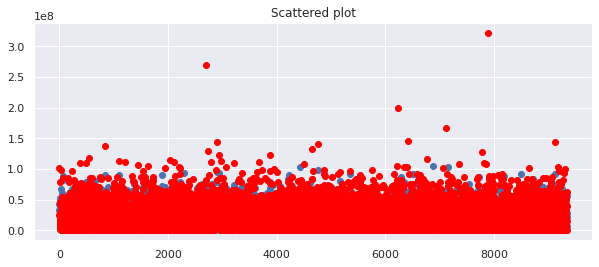

In [ ]:
y_preds = []
X_test = X_test
for weight, model in automl.get_models_with_weights():
  y_pred = model.predict(X_test)
  y_preds.append(y_pred * weight)
    
y_pred = np.sum(y_preds, axis=0)
visualize_regression(y_test, y_pred)